In [251]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import itertools

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **(1) Load the 2 datasets**

In [377]:
df_15 = pd.read_csv('/2015.csv')
df_19 = pd.read_csv('/2019.csv')

# **(2) Remove 'Dystopia residual' from 2015 dataset**

In [3]:
df_15 = df_15.drop(columns=['Dystopia Residual'])
df_15.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity'],
      dtype='object')

# **(3) Add new column 'Year' to both 2015 and 2019 dataset**

In [5]:
#Happiness Data 2015
df_15['Year'] = 2015
df_15.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Year'],
      dtype='object')

In [6]:
#Happiness Data 2019
df_19['Year'] = 2019
df_19.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Year'],
      dtype='object')

# **(4) Create a new column 'Region' and assign regions from 2015 dataset to the respective countries in 2019 dataset**

In [57]:
#Created dictionairy combining each country with it's appropriate region in a key-value pair in the 2015 dataset
dict_country_region = {}
for country, region in zip(df_15['Country'], df_15['Region']):
  dict_country_region[country] = region
print(dict_country_region)

#Renamed column 'Country or region' to 'Country' in 2019 dataset for convenience
df_19.rename(columns = {'Country or region':'Country'}, inplace = True)


{'Afghanistan': 'Southern Asia', 'Albania': 'Central and Eastern Europe', 'Algeria': 'Middle East and Northern Africa', 'Angola': 'Sub-Saharan Africa', 'Argentina': 'Latin America and Caribbean', 'Armenia': 'Central and Eastern Europe', 'Australia': 'Australia and New Zealand', 'Austria': 'Western Europe', 'Azerbaijan': 'Central and Eastern Europe', 'Bahrain': 'Middle East and Northern Africa', 'Bangladesh': 'Southern Asia', 'Belarus': 'Central and Eastern Europe', 'Belgium': 'Western Europe', 'Benin': 'Sub-Saharan Africa', 'Bhutan': 'Southern Asia', 'Bolivia': 'Latin America and Caribbean', 'Bosnia and Herzegovina': 'Central and Eastern Europe', 'Botswana': 'Sub-Saharan Africa', 'Brazil': 'Latin America and Caribbean', 'Bulgaria': 'Central and Eastern Europe', 'Burkina Faso': 'Sub-Saharan Africa', 'Burundi': 'Sub-Saharan Africa', 'Cambodia': 'Southeastern Asia', 'Cameroon': 'Sub-Saharan Africa', 'Canada': 'North America', 'Central African Republic': 'Sub-Saharan Africa', 'Chad': 'Sub-

In [128]:
#Alphabetically sorted 2015 dataset by country
df_15.sort_values(by=['Country'], inplace=True)
df_15

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510
94,Albania,Central and Eastern Europe,95,4.959,0.05013,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272
67,Algeria,Middle East and Northern Africa,68,5.605,0.05099,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822
136,Angola,Sub-Saharan Africa,137,4.033,0.04758,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344
29,Argentina,Latin America and Caribbean,30,6.574,0.04612,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451
...,...,...,...,...,...,...,...,...,...,...,...
22,Venezuela,Latin America and Caribbean,23,6.810,0.06476,1.04424,1.25596,0.72052,0.42908,0.11069,0.05841
74,Vietnam,Southeastern Asia,75,5.360,0.03107,0.63216,0.91226,0.74676,0.59444,0.10441,0.16860
135,Yemen,Middle East and Northern Africa,136,4.077,0.04367,0.54649,0.68093,0.40064,0.35571,0.07854,0.09131
84,Zambia,Sub-Saharan Africa,85,5.129,0.06988,0.47038,0.91612,0.29924,0.48827,0.12468,0.19591


In [123]:
#Alphabetically sorted 2019 dataset by country
df_19.sort_values(by=['Country'], inplace=True)
df_19

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Region
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,Sub-Saharan Africa
106,107,Albania,4.719,0.947,0.848,0.874,0.383,0.178,0.027,Sub-Saharan Africa
87,88,Algeria,5.211,1.002,1.160,0.785,0.086,0.073,0.114,Sub-Saharan Africa
46,47,Argentina,6.086,1.092,1.432,0.881,0.471,0.066,0.050,Sub-Saharan Africa
115,116,Armenia,4.559,0.850,1.055,0.815,0.283,0.095,0.064,Sub-Saharan Africa
...,...,...,...,...,...,...,...,...,...,...
107,108,Venezuela,4.707,0.960,1.427,0.805,0.154,0.064,0.047,Sub-Saharan Africa
93,94,Vietnam,5.175,0.741,1.346,0.851,0.543,0.147,0.073,Sub-Saharan Africa
150,151,Yemen,3.380,0.287,1.163,0.463,0.143,0.108,0.077,Sub-Saharan Africa
137,138,Zambia,4.107,0.578,1.058,0.426,0.431,0.247,0.087,Sub-Saharan Africa


In [264]:
#Gathered list of countries in 'Country' column of 2015 and 2019 datasets into C1 and C2 respectively
C1 = []
C2 = []
for country1, country2 in zip(df_15['Country'], df_19['Country or region']):
  C1.append(country1)
  C2.append(country2)
C1 = sorted(C1)
C2 = sorted(C2)

In [149]:
#Function determines the differences in countries in the C1 and C2 list
def difference(li1, li2):
    return (list(list(set(li1)-set(li2)) + list(set(li2)-set(li1))))
difference = sorted(difference(C1, C2))
print(difference)

['Angola', 'Djibouti', 'Gambia', 'Macedonia', 'Namibia', 'North Cyprus', 'North Macedonia', 'Northern Cyprus', 'Oman', 'Somalia', 'Somaliland region', 'South Sudan', 'Sudan', 'Suriname', 'Trinidad & Tobago', 'Trinidad and Tobago', 'Zambia', 'Zimbabwe']


In [129]:
#Removed countries that are not in 2019 dataset
dict_country_region = sorted(dict_country_region)
for key in difference:
  if key in dict_country_region:
    del dict_country_region[key]
print(dict_country_region)

['Afghanistan', 'Albania', 'Algeria', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Haiti', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Ivory Coast', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Malays

In [115]:
#Looped through dictionary created earlier to match countries, the existence of a country was indicated by an index number greater than 0, if country existed then the value pair of dictionary assigned to 'Region' column at specific index for that country
for country, region in zip(dict_country_region, df_19['Region']) :
  index = df_19[df_19['Country'] == country].index.values
  if index > 0:
    df_19['Region'][index] = dict_country_region[country]
df_19

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Region
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,Southern Asia
106,107,Albania,4.719,0.947,0.848,0.874,0.383,0.178,0.027,Central and Eastern Europe
87,88,Algeria,5.211,1.002,1.160,0.785,0.086,0.073,0.114,Middle East and Northern Africa
46,47,Argentina,6.086,1.092,1.432,0.881,0.471,0.066,0.050,Latin America and Caribbean
115,116,Armenia,4.559,0.850,1.055,0.815,0.283,0.095,0.064,Central and Eastern Europe
...,...,...,...,...,...,...,...,...,...,...
107,108,Venezuela,4.707,0.960,1.427,0.805,0.154,0.064,0.047,Latin America and Caribbean
93,94,Vietnam,5.175,0.741,1.346,0.851,0.543,0.147,0.073,Southeastern Asia
150,151,Yemen,3.380,0.287,1.163,0.463,0.143,0.108,0.077,Middle East and Northern Africa
137,138,Zambia,4.107,0.578,1.058,0.426,0.431,0.247,0.087,Sub-Saharan Africa


# **(5) Merge the 2 datasets to form a new one with same number of columns as 2015**

In [350]:
#Sort the differences in countries from both 2015 and 2019 into separate lists 
match_df_15 = list(set(C1).intersection(difference))
match_df_19 = list(set(C2).intersection(difference))
if 'Trinidad & Tobago' in match_df_19:
  match_df_19[3] = 'Trinidad and Tobago'
rm_match = list(set(match_df_15).intersection(match_df_19))

for x in match_df_15:
  if x == 'Zambia' or  x == 'Zimbabwe' or  x == 'Trinidad and Tobago':
    match_df_15.remove(x)
match_df_15.remove('Trinidad and Tobago')
print("Countries participated in 2015 but not 2019: ", match_df_15)

for x in match_df_19:
  if x == 'Zambia' or  x == 'Zimbabwe' or  x == 'Trinidad and Tobago':
    match_df_19.remove(x)
print("Countries participated in 2019 but not 2015: ", match_df_19)

Countries participated in 2015 but not 2019:  ['Macedonia', 'Oman', 'Suriname', 'Djibouti', 'North Cyprus', 'Somaliland region', 'Sudan', 'Angola']
Countries participated in 2019 but not 2015:  ['North Macedonia', 'Somalia', 'Namibia', 'Gambia', 'South Sudan', 'Northern Cyprus']


In [330]:
#Indexes of Removing Countries from 2015 dataset
print(df_15[df_15['Country'] == 'Macedonia'].index.values)
print(df_15[df_15['Country'] == 'Oman'].index.values)
print(df_15[df_15['Country'] == 'Suriname'].index.values)
print(df_15[df_15['Country'] == 'Djibouti'].index.values)
print(df_15[df_15['Country'] == 'North Cyprus'].index.values)
print(df_15[df_15['Country'] == 'Somaliland region'].index.values)
print(df_15[df_15['Country'] == 'Sudan'].index.values)
print(df_15[df_15['Country'] == 'Angola'].index.values)

df_15 = df_15.drop(92)
df_15 = df_15.drop(21)
df_15 = df_15.drop(39)
df_15 = df_15.drop(125)
df_15 = df_15.drop(65)
df_15 = df_15.drop(90)
df_15 = df_15.drop(117)
df_15 = df_15.drop(136)

[92]
[21]
[39]
[125]
[65]
[90]
[117]
[136]


In [331]:
#Indexes of Removing Countries from 2019 dataset
print(df_19[df_19['Country or region'] == 'North Macedonia'].index.values)
print(df_19[df_19['Country or region'] == 'Somalia'].index.values)
print(df_19[df_19['Country or region'] == 'Namibia'].index.values)
print(df_19[df_19['Country or region'] == 'Gambia'].index.values)
print(df_19[df_19['Country or region'] == 'South Sudan'].index.values)
print(df_19[df_19['Country or region'] == 'Northern Cyprus'].index.values)

df_19 = df_19.drop(83)
df_19 = df_19.drop(111)
df_19 = df_19.drop(112)
df_19 = df_19.drop(119)
df_19 = df_19.drop(155)
df_19 = df_19.drop(63)

[83]
[111]
[112]
[119]
[155]
[63]


In [358]:
#Dropped columns from 2019 dataset
df_19.drop(columns=['Perceptions of corruption', 'Score', 'GDP per capita', 'Overall rank'])

,Country,Social support,Healthy life expectancy,Freedom to make life choices,Generosity
0,Finland,1.587,0.986,0.596,0.153
1,Denmark,1.573,0.996,0.592,0.252
2,Norway,1.582,1.028,0.603,0.271
3,Iceland,1.624,1.026,0.591,0.354
4,Netherlands,1.522,0.999,0.557,0.322
...,...,...,...,...,...
150,Yemen,1.163,0.463,0.143,0.108
151,Rwanda,0.711,0.614,0.555,0.217
152,Tanzania,0.885,0.499,0.417,0.276
153,Afghanistan,0.517,0.361,0.000,0.158


In [359]:
#Dropped columns from 2015 dataset
df_15.drop(columns=['Standard Error','Dystopia Residual','Generosity','Health (Life Expectancy)','Freedom', 'Economy (GDP per Capita)'])

,Country,Region,Happiness Rank,Happiness Score,Family,Trust (Government Corruption)
0,Switzerland,Western Europe,1,7.587,1.34951,0.41978
1,Iceland,Western Europe,2,7.561,1.40223,0.14145
2,Denmark,Western Europe,3,7.527,1.36058,0.48357
3,Norway,Western Europe,4,7.522,1.33095,0.36503
4,Canada,North America,5,7.427,1.32261,0.32957
...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.77370,0.55191
154,Benin,Sub-Saharan Africa,155,3.340,0.35386,0.08010
155,Syria,Middle East and Northern Africa,156,3.006,0.47489,0.18906
156,Burundi,Sub-Saharan Africa,157,2.905,0.41587,0.10062


In [362]:
#Merged 2015 and 2019 datasets
merged = pd.merge(df_15, df_19, on='Country')
merged.drop(columns=['Standard Error','Dystopia Residual','Health (Life Expectancy)','Freedom', 'Economy (GDP per Capita)', 'Perceptions of corruption', 'Score', 'GDP per capita', 'Overall rank'])

,Country,Region,Happiness Rank,Happiness Score,Family,Trust (Government Corruption),Generosity_x,Social support,Healthy life expectancy,Freedom to make life choices,Generosity_y
0,Switzerland,Western Europe,1,7.587,1.34951,0.41978,0.29678,1.526,1.052,0.572,0.263
1,Iceland,Western Europe,2,7.561,1.40223,0.14145,0.43630,1.624,1.026,0.591,0.354
2,Denmark,Western Europe,3,7.527,1.36058,0.48357,0.34139,1.573,0.996,0.592,0.252
3,Norway,Western Europe,4,7.522,1.33095,0.36503,0.34699,1.582,1.028,0.603,0.271
4,Canada,North America,5,7.427,1.32261,0.32957,0.45811,1.505,1.039,0.584,0.285
...,...,...,...,...,...,...,...,...,...,...,...
144,Rwanda,Sub-Saharan Africa,154,3.465,0.77370,0.55191,0.22628,0.711,0.614,0.555,0.217
145,Benin,Sub-Saharan Africa,155,3.340,0.35386,0.08010,0.18260,0.437,0.397,0.349,0.175
146,Syria,Middle East and Northern Africa,156,3.006,0.47489,0.18906,0.47179,0.378,0.440,0.013,0.331
147,Burundi,Sub-Saharan Africa,157,2.905,0.41587,0.10062,0.19727,0.447,0.380,0.220,0.176


In [363]:
concatenated = pd.concat([df_15, df_19], ignore_index=True)


# **(6) List the countries that participated in 2015 but not 2019**

In [351]:
match_df_15 = list(set(C1).intersection(difference))
match_df_19 = list(set(C2).intersection(difference))
if 'Trinidad & Tobago' in match_df_19:
  match_df_19[3] = 'Trinidad and Tobago'
rm_match = list(set(match_df_15).intersection(match_df_19))

for x in match_df_15:
  if x == 'Zambia' or  x == 'Zimbabwe' or  x == 'Trinidad and Tobago':
    match_df_15.remove(x)
match_df_15.remove('Trinidad and Tobago')
print("Countries participated in 2015 but not 2019: ", match_df_15)

Countries participated in 2015 but not 2019:  ['Macedonia', 'Oman', 'Suriname', 'Djibouti', 'North Cyprus', 'Somaliland region', 'Sudan', 'Angola']


# **(7) Plot a barchart for the countries' generosity for each year**

Text(0.5, 0, 'Country')

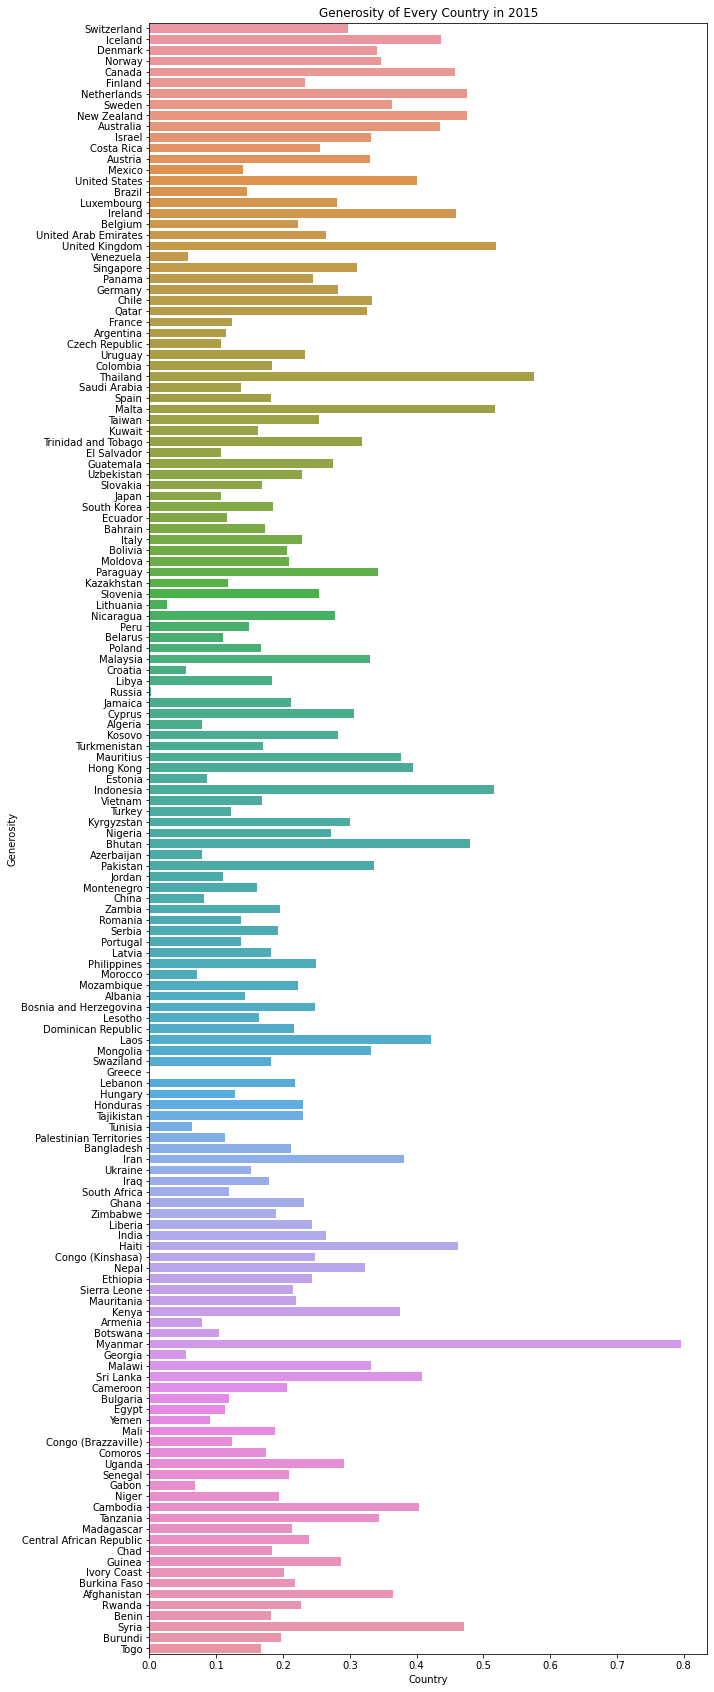

In [348]:
#Countries' generosity for 2015

#Determining figure size
plt.figure(figsize=(10,30))

#Add title
plt.title("Generosity of Every Country in 2015")

#Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x = df_15['Generosity'],  y = df_15['Country'])

#Add label for vertical axis
plt.ylabel("Generosity")

#Add label for horizontal axis
plt.xlabel("Country")

Text(0.5, 0, 'Country')

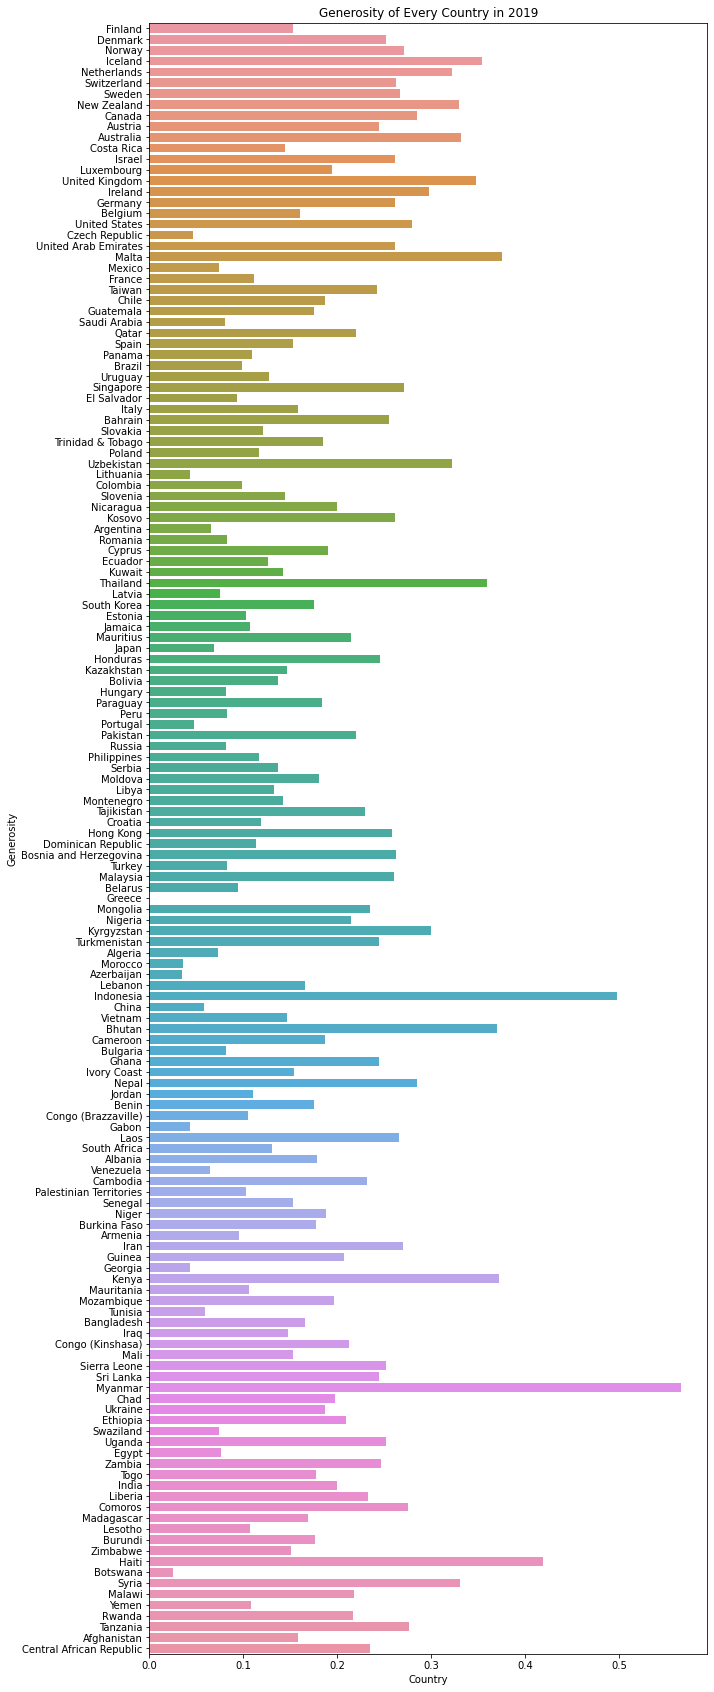

In [347]:
#Countries' generosity for 2019

#Determining figure size
plt.figure(figsize=(10,30))

# Add title
plt.title("Generosity of Every Country in 2019")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x = df_19['Generosity'],  y = df_19['Country'])

#Add label for vertical axis
plt.ylabel("Generosity")

#Add label for horizontal axis
plt.xlabel("Country")

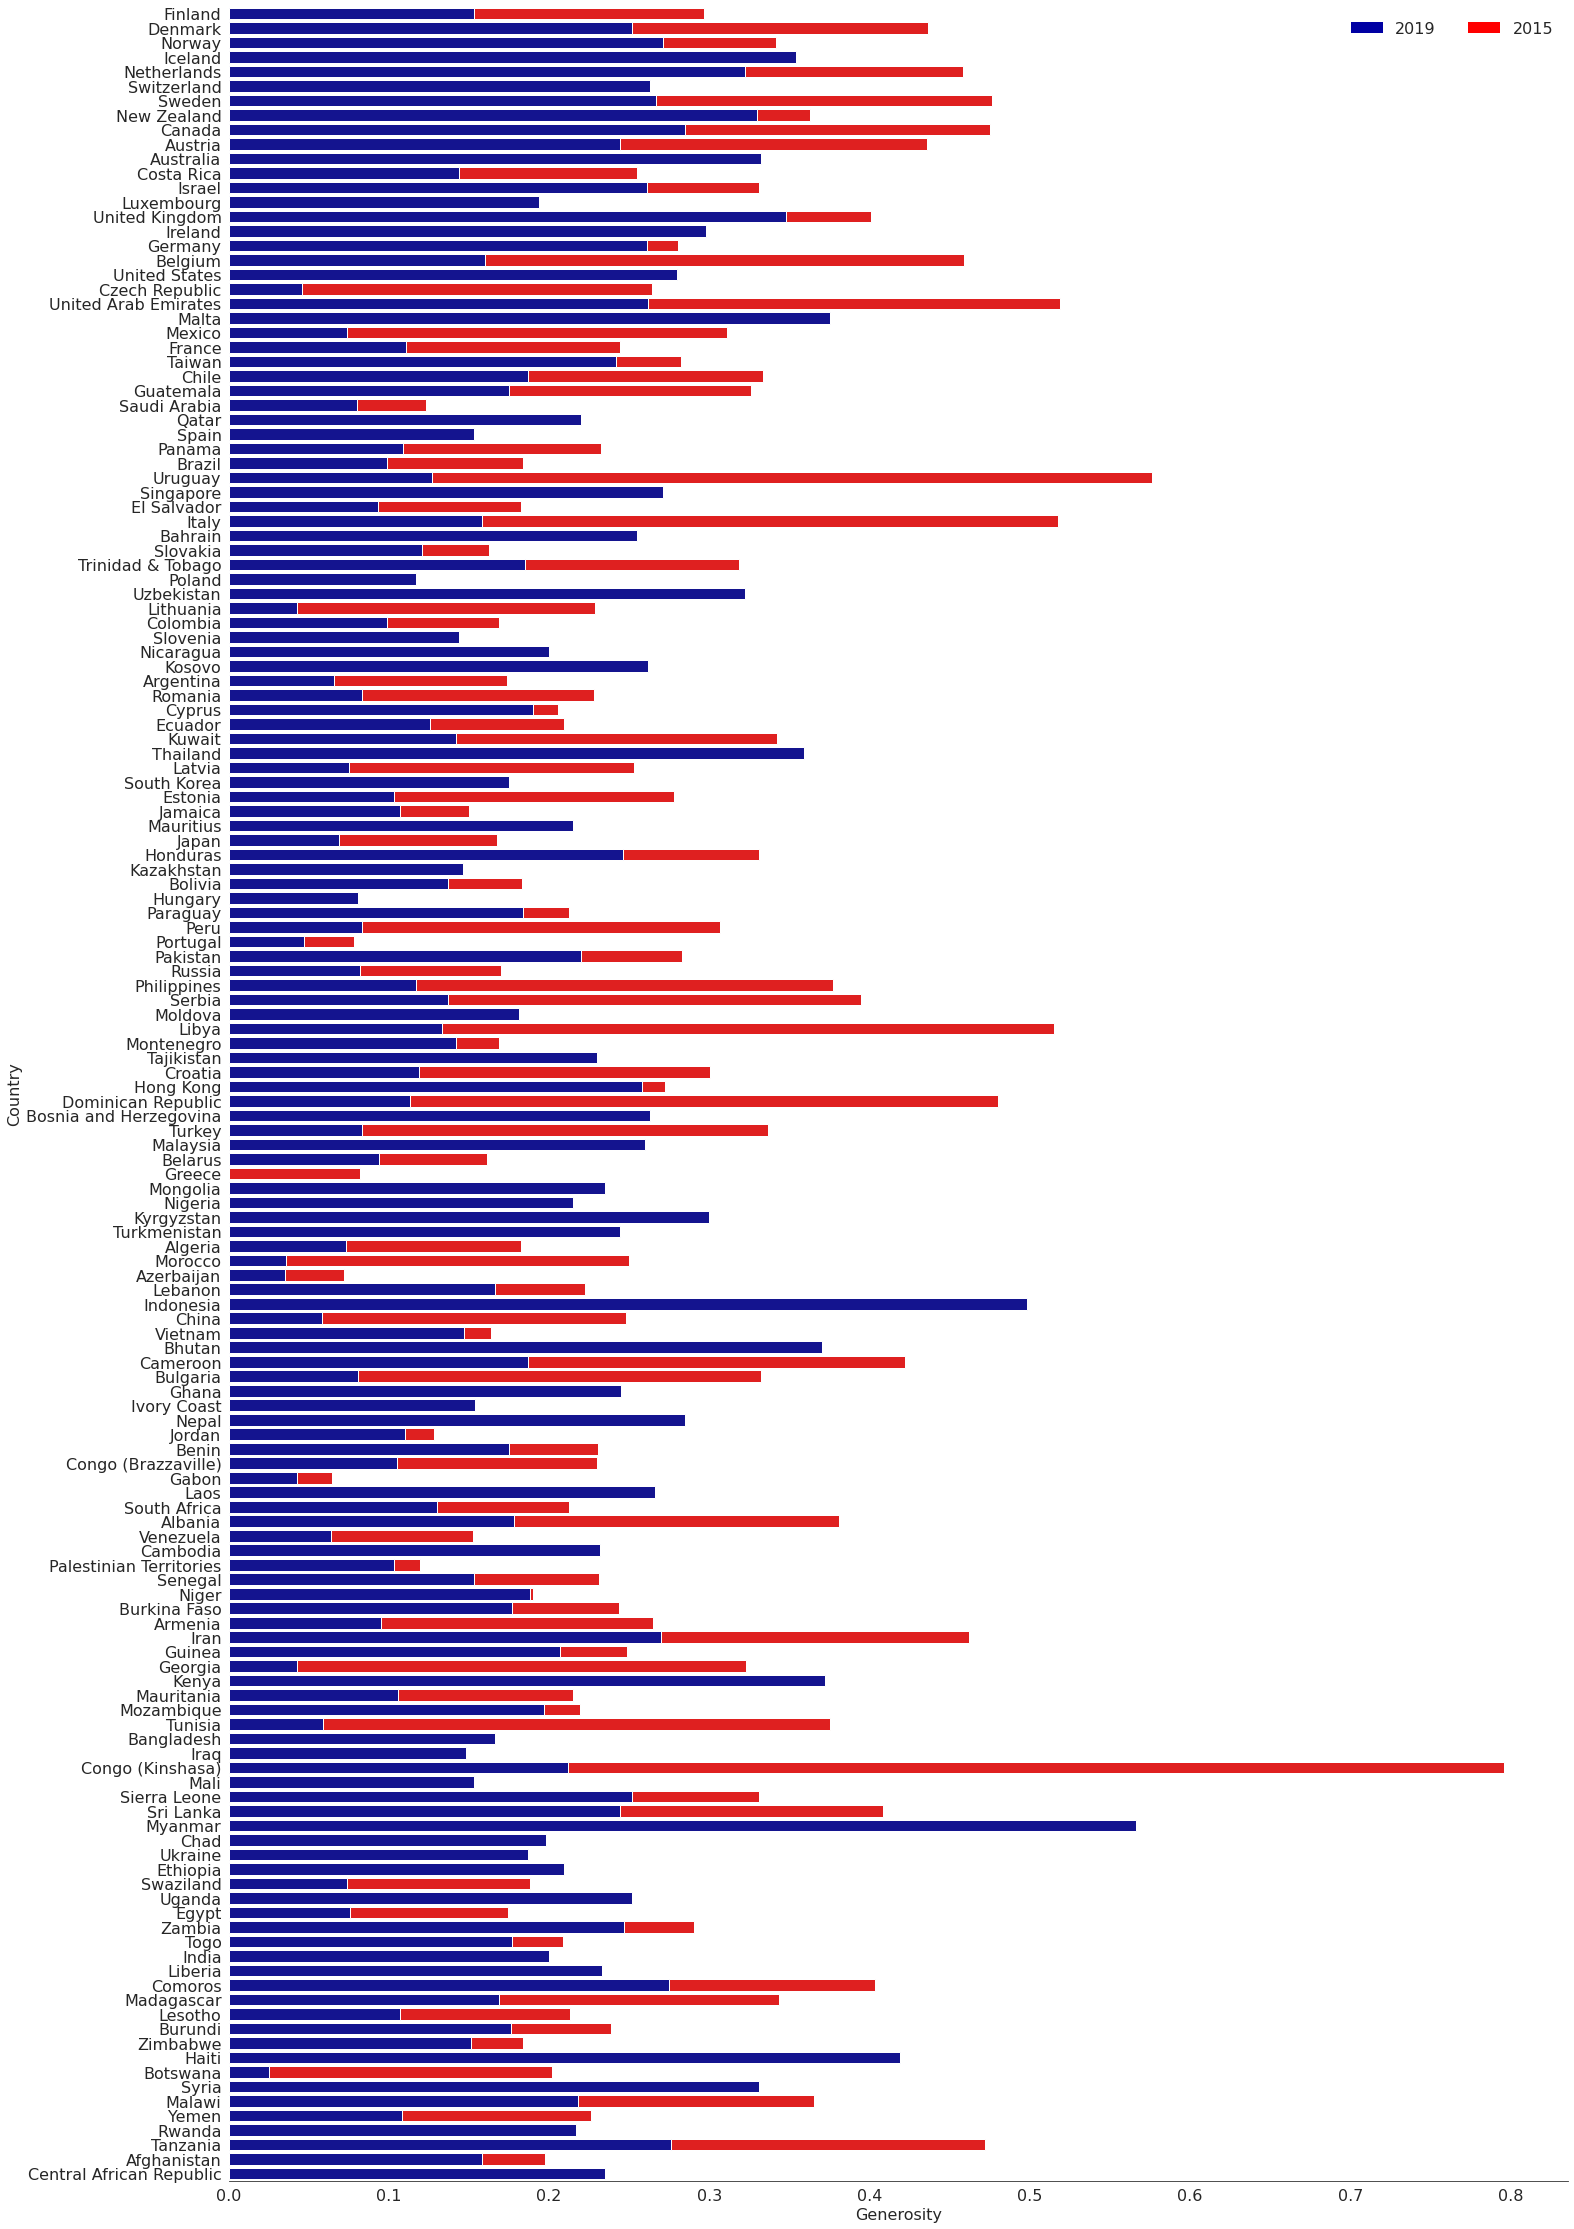

In [368]:
#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 40)})

#Plot 1 - background - "total" (top) series
sns.barplot(y = df_15['Country'], x = df_15['Generosity'], color = "red")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(y = df_19['Country'], x = df_19['Generosity'], color = "#0000A3")


topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['2019', '2015'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
bottom_plot.set_ylabel("Country")
bottom_plot.set_xlabel("Generosity")

#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)

#**(8) Bubble chart of 'Freedom' vs. 'Social support' where the size of the bubble is the GDP per Capital for 2019**

Text(0.5, 1.0, 'Freedom vs. Social support')

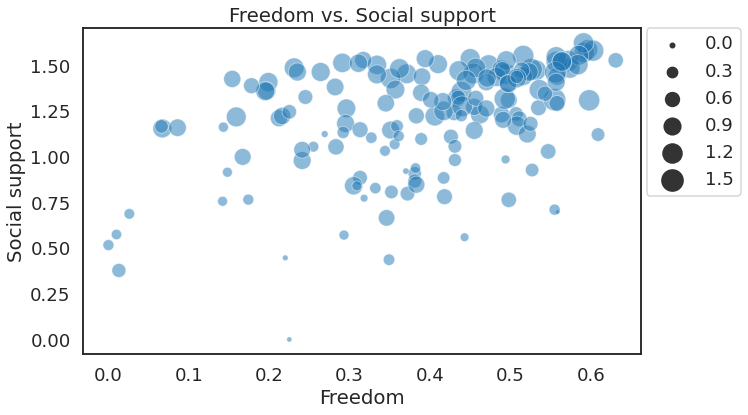

In [409]:
#'Trust' values weren't in the 2019 dataset so 'Social support' values were substituted
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(10,6))
sns.scatterplot(x = df_19['Freedom to make life choices'], y = df_19['Social support'],
                size=df_19['GDP per capita'],
                sizes=(20,500),
                alpha=0.5,
                data=df_19)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

#Horizontal label, Vertical Label, Title
plt.xlabel('Freedom')
plt.ylabel('Social support')
plt.title('Freedom vs. Social support')

# **(9) Bubble chart of 'Family' vs. 'Health' where the size is the happiness score of 2015**

Text(0.5, 1.0, 'Family vs. Health')

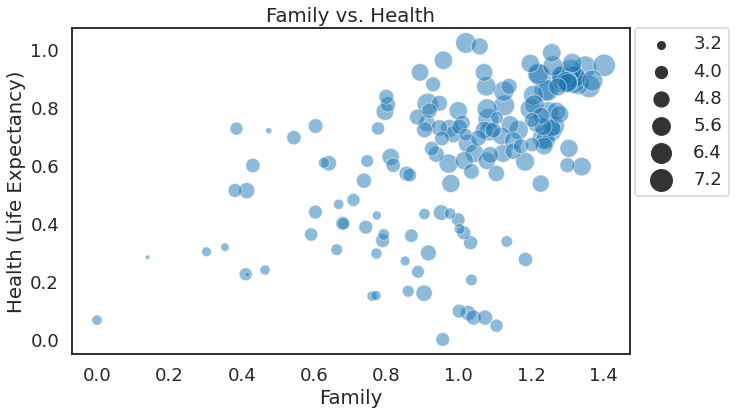

In [407]:
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(10,6))
sns.scatterplot(x = df_15['Family'], y = df_15['Health (Life Expectancy)'],
                size=df_15['Happiness Score'],
                sizes=(20,500),
                alpha=0.5,
                data=df_15)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

#Horizontal label, Vertical Label, Title
plt.xlabel('Family')
plt.ylabel('Health (Life Expectancy)')
plt.title('Family vs. Health')

#**(10) List the first 3 variables that correlate with Happiness score (use Pearson Correlation)**

In [453]:
import pandas as pd 
from scipy.stats import pearsonr 

var_list = []
variables = ['Health','Family','Freedom', 'Trust', 'Generosity', 'Dystopia Residual']
#Variable: Health (Life Expectancy)

# Convert dataframe into series 
happy_score = df_15['Happiness Score'] 
life_exp = df_15['Health (Life Expectancy)'] 
  
# Apply the pearsonr() 
corr1, _ = pearsonr(happy_score, life_exp) 
print('Pearsons correlation for Health: %.3f' % corr1) 
var_list.append(corr1)

#Variable: Family

# Convert dataframe into series 
happy_score = df_15['Happiness Score'] 
family = df_15['Family'] 
  
# Apply the pearsonr() 
corr2, _ = pearsonr(happy_score,family) 
print('Pearsons correlation for Family: %.3f' % corr2)
var_list.append(corr2)

#Variable: Freedom

# Convert dataframe into series 
happy_score = df_15['Happiness Score'] 
freedom = df_15['Freedom'] 
  
# Apply the pearsonr() 
corr3, _ = pearsonr(happy_score, freedom) 
print('Pearsons correlation for Freedom: %.3f' % corr3)
var_list.append(corr3)

#Variable: Trust (Government Corruption)

# Convert dataframe into series 
happy_score = df_15['Happiness Score'] 
trust = df_15['Trust (Government Corruption)'] 
  
# Apply the pearsonr() 
corr4, _ = pearsonr(happy_score, trust) 
print('Pearsons correlation for Trust: %.3f' % corr4)
var_list.append(corr4)

#Variable: Generosity

# Convert dataframe into series 
happy_score = df_15['Generosity'] 
generosity = df_15['Trust (Government Corruption)'] 
  
# Apply the pearsonr() 
corr5, _ = pearsonr(happy_score, generosity) 
print('Pearsons correlation for Generosity: %.3f' % corr5)
var_list.append(corr5)
  
#Variable: Dystopia Residual

# Convert dataframe into series 
happy_score = df_15['Happiness Score'] 
dystopia_residual = df_15['Dystopia Residual'] 
  
# Apply the pearsonr() 
corr6, _ = pearsonr(happy_score, dystopia_residual) 
print('Pearsons correlation for Dystopia Residual: %.3f' % corr6)
var_list.append(corr6)

Pearsons correlation for Health: 0.724
Pearsons correlation for Family: 0.741
Pearsons correlation for Freedom: 0.568
Pearsons correlation for Trust: 0.395
Pearsons correlation for Generosity: 0.276
Pearsons correlation for Dystopia Residual: 0.530


In [451]:
dict = {}
for a,b in zip(variables, var_list):
  dict[b] = a
x = sorted(dict.items(), reverse=True)[:3]
x

[(0.740605197236785, 'Family'),
 (0.7241995951050695, 'Health'),
 (0.5682109041925176, 'Freedom')]